In [62]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [63]:
train_df = pd.read_excel('../input/pulsarml/Training_PulsarStars.xlsx')

In [64]:
train_df.to_csv('Training_PulsarStars.csv',index=None,header=True)

In [65]:
train_df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


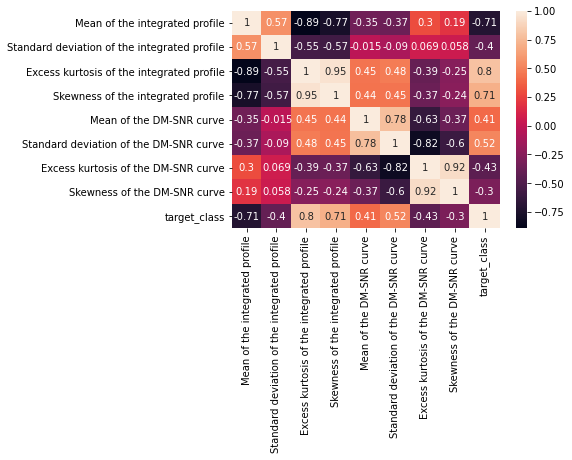

In [66]:
corr_matrix = train_df.corr()
sn.heatmap(corr_matrix,annot= True)
plt.show()

In [67]:
train_df['mean_sd_integrated'] = train_df['Mean of the integrated profile'] + 3*train_df['Standard deviation of the integrated profile']
train_df['skew_exkurt_integrated'] = train_df['Skewness of the integrated profile']+train_df['Excess kurtosis of the integrated profile']
train_df.drop(['Mean of the integrated profile','Standard deviation of the integrated profile','Skewness of the integrated profile','Excess kurtosis of the integrated profile'],axis=1,inplace = True)
train_df.head()

,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class,mean_sd_integrated,skew_exkurt_integrated
0,3.199833,19.110426,7.975532,74.242225,0,307.613846,-0.934220
1,1.677258,14.860146,10.576487,127.393580,0,279.155103,-0.049770
2,3.121237,21.744669,7.735822,63.171909,0,221.040573,1.374493
3,3.642977,20.959280,6.896499,53.593661,0,308.285346,-0.704653
4,1.178930,11.468720,14.269573,252.567306,0,210.743239,1.724358


In [68]:
train_df['mean_sd_dmsnr'] = train_df['Mean of the DM-SNR curve'] + 3*train_df['Standard deviation of the DM-SNR curve']
train_df['skew_exkurt_dmsnr'] = train_df['Skewness of the DM-SNR curve']+train_df['Excess kurtosis of the DM-SNR curve']
train_df.drop(['Mean of the DM-SNR curve','Standard deviation of the DM-SNR curve','Skewness of the DM-SNR curve','Excess kurtosis of the DM-SNR curve'],axis=1,inplace = True)
train_df.head()

,target_class,mean_sd_integrated,skew_exkurt_integrated,mean_sd_dmsnr,skew_exkurt_dmsnr
0,0,307.613846,-0.934220,60.531112,82.217757
1,0,279.155103,-0.049770,46.257695,137.970066
2,0,221.040573,1.374493,68.355244,70.907731
3,0,308.285346,-0.704653,66.520817,60.490160
4,0,210.743239,1.724358,35.585089,266.836879


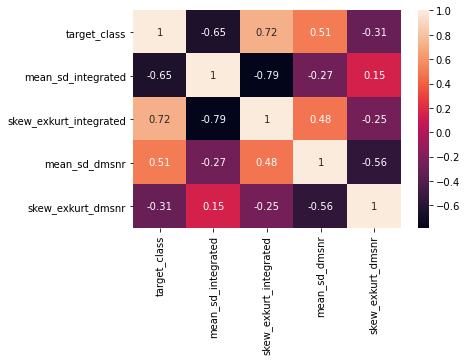

In [69]:
corr_matrix = train_df.corr()
sn.heatmap(corr_matrix,annot= True)
plt.show()

In [70]:
##use of pca and gda algo
from sklearn.preprocessing import StandardScaler
df=train_df
features = ['mean_sd_integrated','skew_exkurt_integrated','mean_sd_dmsnr','skew_exkurt_dmsnr']
x = df.loc[:, features].values
y = df.loc[:,['target_class']].values
x = StandardScaler().fit_transform(x)

Text(0, 0.5, 'cumulative explained variance')

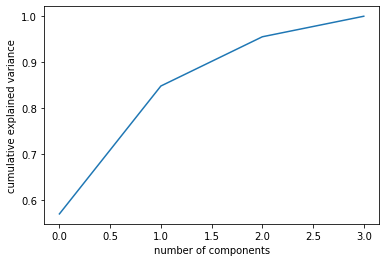

In [71]:
#code for choosing the cumulative variance explained vs number of principal components. 
from sklearn.decomposition import PCA
pca_test = PCA().fit(x)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#pca = PCA(.96)
#pca.fit(x)
#pca.n_components_

In [72]:

pca = PCA(n_components=3)# n_components=3 from above plot
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1','pc2','pc3'])
finalDf = pd.concat([principalDf, df[['target_class']]], axis = 1)
finalDf.head()

,pc1,pc2,pc3,target_class
0,-1.090269,-0.836871,-0.084946,0
1,-0.986070,-0.043436,-0.035000,0
2,0.176177,0.187412,-0.636215,0
3,-0.965583,-0.999026,-0.163290,0
4,-0.603161,1.697709,0.242405,0


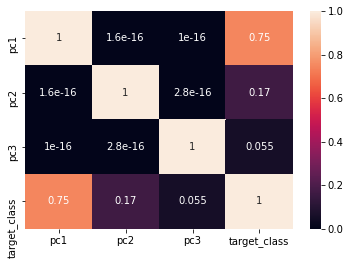

In [73]:
corr_matrix = finalDf.corr()
sn.heatmap(corr_matrix,annot= True)
plt.show()

In [74]:
positive =0
negative =0
for labels in df['target_class']:
    if labels is 0:
        negative +=1
    if labels is 1:
        positive +=1
        
print("Positive:",positive ) 
print("Negative:",negative )

Positive: 1251
Negative: 8748


In [75]:
x=principalDf
y=df['target_class']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2,random_state=42)

In [77]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [78]:
#using svm

In [79]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2= clf.predict(X_test)

In [80]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))#for Naive Bayes
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(roc_auc_score(y_test, y_pred2))#for SVM Classifier


Accuracy: 0.957
0.8658580960864023
Accuracy: 0.9665
0.8862364410393101


No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.958
SVM : ROC AUC=0.915


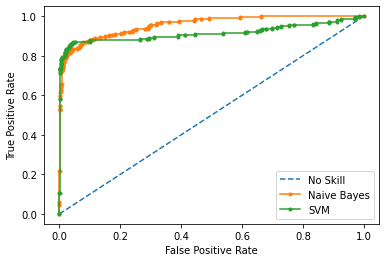

In [81]:
#Plotting the true positive rate vs false positive rate
noskill_probs = [0 for _ in range(len(y_test))]
nb_probs = gnb.predict_proba(X_test)
svm_probs = clf.predict_proba(X_test)
nb_probs=nb_probs[:,1]
svm_probs=svm_probs[:,1]
# calculate scores
noskill_auc = roc_auc_score(y_test, noskill_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (noskill_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('SVM : ROC AUC=%.3f' % (svm_auc))
# calculate roc curves
noskill_fpr, noskill_tpr, _ = roc_curve(y_test, noskill_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
# plot the roc curve for the model
plt.plot(noskill_fpr, noskill_tpr, linestyle='--', label='No Skill')
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()